This script reads in the random effect linear regression model results between Active GCA and Inactive GCA. It gathers the proteins from Active GCA and Inactive GCA and makes a heatmap after doing a z-score transformation on the data. Age, sex, smoking status, and BMI are denoted at the top of each heatmap for each study participant.

In [ ]:
library("dplyr")
library("ggpubr")
library("lme4")
library("lmerTest")
library("ggplot2")
library("pheatmap")
vasculitis_demographics_df <- read.csv("../../data/vasculitis_patient_info.csv")

#read in all quantile data
all_quantile_df = read.csv("../../data/all_quantile_data.csv")
#head(all_quantile_df)
#get the number of columns and rows 
num_columns <- ncol(all_quantile_df)
num_proteins <- ncol(all_quantile_df) - 3
num_samples <- nrow(all_quantile_df)


#filter only active gca patients
active_df <- filter(all_quantile_df,all_quantile_df$Study_group == "Active")
active_demographics_df <- filter(vasculitis_demographics_df,vasculitis_demographics_df$Study_group == "Active")
active_proteins_only <- active_df[,4:num_columns]

#filter inactive gca patients
inactive_df = filter(all_quantile_df,all_quantile_df$Study_group == "Inactive")
inactive_demographics_df <- filter(vasculitis_demographics_df,vasculitis_demographics_df$Study_group == "Inactive")
inactive_proteins_only <- inactive_df[,4:num_columns]

#read in controls data
controls_demographics_df <- read.csv("../../data/controls_demographics.csv")
controls_df <- filter(all_quantile_df,all_quantile_df$Study_group == "Healthy_Control")
controls_proteins_only <- controls_df[,4:num_columns]

proteins_only <- data.frame(active_df[ ,4:num_columns])
#seperate the protein names for the linear model
protein_names <- data.frame(matrix(data=0,nrow=num_proteins,ncol=1))
colnames(protein_names) <- "Protein"
protein_names[ , 1] <- data.frame(colnames(proteins_only))
#protein_names

In [2]:
active_df = active_df[order(active_df$maskID),]
active_demographics_df = active_demographics_df[order(active_demographics_df$maskid),]
active_df$maskID == active_demographics_df$maskid

inactive_df = inactive_df[order(inactive_df$maskID),]
inactive_demographics_df = inactive_demographics_df[order(inactive_demographics_df$maskid),]
inactive_df$maskID == inactive_demographics_df$maskid

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [41]:
active_df$maskID

[1] "GCA-1"  "GCA-10" "GCA-11" "GCA-12" "GCA-13" "GCA-14" "GCA-15" "GCA-16"
 [9] "GCA-17" "GCA-18" "GCA-19" "GCA-2"  "GCA-20" "GCA-21" "GCA-22" "GCA-23"
[17] "GCA-24" "GCA-25" "GCA-26" "GCA-27" "GCA-28" "GCA-29" "GCA-3"  "GCA-30"
[25] "GCA-4"  "GCA-5"  "GCA-6"  "GCA-7"  "GCA-8"  "GCA-9"

In [3]:
get_sigfeatures = function(num_sigfigs, sigfeature_list, data_df, results_df){
  #Gather the significant features into a new dataframe
  for (i in 1:num_sigfigs) {
    feature1 <- sigfeature_list[i,1]
    feature_to_add <- data_df[feature1]
    results_df[,i] <- feature_to_add
  }
  return(results_df)
}

In [5]:
#read in results from active vs. inactive
linear_modeling_results = read.csv("../../analysis/linear_modeling_active_and_inactive/linear_models_with_covariates_results.csv")
head(linear_modeling_results)

,Protein,Nominal_pvalue,formula,fold_change,adjusted_pvalue,Target,Entrez
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,CRBB2_10000.28,0.09473738,~ Study_group + (1|maskID),-0.06984509,0.9999376,CRBB2,1415
2,c.Raf_10001.7,0.55398949,~ Study_group + (1|maskID),0.03635713,0.9999376,c-Raf,5894
3,ZNF41_10003.15,0.39184987,~ Study_group + (1|maskID) + Methotrexate,-0.12372423,0.9999376,ZNF41,7592
4,ELK1_10006.25,0.31436509,~ Study_group + (1|maskID) + Sex,-0.98806340,0.9999376,ELK1,2002
5,GUC1A_10008.43,0.34122022,~ Study_group + (1|maskID),0.14157654,0.9999376,GUC1A,2978
6,BECN1_10010.10,0.36480887,~ Study_group + (1|maskID) + Age + Prednisone,-0.09990579,0.9999376,BECN1,8678


In [6]:
#get significant higher in active and lower in active
significant_higher_in_active = filter(linear_modeling_results,linear_modeling_results$Nominal_pvalue < 0.01 & linear_modeling_results$fold_change > 0)
dim(significant_higher_in_active)
higher_protein_names = data.frame(significant_higher_in_active[,1])
num_higher_in_active = nrow(significant_higher_in_active)

significant_lower_in_active = filter(linear_modeling_results,linear_modeling_results$Nominal_pvalue < 0.01 & linear_modeling_results$fold_change < 0)
dim(significant_lower_in_active)
lower_protein_names = data.frame(significant_lower_in_active[,1])
num_lower_in_active = nrow(lower_protein_names)
total_num_significant = num_higher_in_active+num_lower_in_active

[1] 4 7

[1] 6 7

In [7]:
#gather the 4 proteins that are higher in active compared to inactive for active GCA
active_proteins_higher = data.frame(matrix(data=0,nrow = 30, ncol = num_higher_in_active))
colnames(active_proteins_higher) = significant_higher_in_active[,1]
active_proteins_higher = get_sigfeatures(num_higher_in_active, higher_protein_names , active_df, active_proteins_higher)

#get_sigfeatures = function(num_sigfigs, sigfeature_list, data_df, results_df)
head(active_proteins_higher)

,Apo.A.IV_17685.9,PGCB_3461.58,Protein.disulfide.isomerase_4278.14,Eotaxin_5301.7
,<dbl>,<dbl>,<dbl>,<dbl>
1,53530.21,1132.5422,139.7789,17595.747
2,56960.55,1458.2700,143.9733,13668.098
3,78246.65,1203.2367,110.7444,20824.489
4,57341.34,674.1711,136.4156,15120.460
5,50673.13,941.3222,136.4156,9568.836
6,50951.43,956.8467,219.9456,20334.804


In [8]:
#do the same for inactive, gather the 4 proteins higher in active compared to inactive
inactive_proteins_higher = data.frame(matrix(data=0,nrow = 30, ncol = num_higher_in_active))
colnames(inactive_proteins_higher) = significant_higher_in_active[,1]
inactive_proteins_higher = get_sigfeatures(num_higher_in_active, higher_protein_names , inactive_df, inactive_proteins_higher)

#get_sigfeatures = function(num_sigfigs, sigfeature_list, data_df, results_df)
head(inactive_proteins_higher)

,Apo.A.IV_17685.9,PGCB_3461.58,Protein.disulfide.isomerase_4278.14,Eotaxin_5301.7
,<dbl>,<dbl>,<dbl>,<dbl>
1,57341.34,1303.5233,132.98222,19805.476
2,30511.46,1009.2356,129.90778,3178.717
3,28742.35,903.9144,99.63556,5369.606
4,60554.94,699.1444,157.40000,17685.076
5,45403.57,803.5811,119.74778,7096.086
6,45579.01,776.3444,171.48778,11742.980


In [9]:
#now get the 6 proteins that are lower in active compared to inactive for active gca
active_proteins_lower = data.frame(matrix(data=0,nrow = 30, ncol = num_lower_in_active))
colnames(active_proteins_lower) = significant_lower_in_active[,1]
active_proteins_lower = get_sigfeatures(num_lower_in_active, lower_protein_names , active_df, active_proteins_lower)

#get_sigfeatures = function(num_sigfigs, sigfeature_list, data_df, results_df)
active_proteins_lower$Study_group = active_df$Study_group
active_proteins_lower$sample_ID = active_df$sample_ID
active_proteins_lower$sex = active_demographics_df$Sex
active_proteins_lower$smoking = active_demographics_df$Smoking
active_proteins_lower$age = active_demographics_df$Age
active_proteins_lower$bmi = active_demographics_df$BMI_Kg_M2

dim(active_proteins_lower)

[1] 30 12

In [10]:
#now get the 6 proteins that are lower in active compared to inactive for inactive gca
inactive_proteins_lower = data.frame(matrix(data=0,nrow = 30, ncol = num_lower_in_active))
colnames(inactive_proteins_lower) = significant_lower_in_active[,1]
inactive_proteins_lower = get_sigfeatures(num_lower_in_active, lower_protein_names , inactive_df, inactive_proteins_lower)

#get_sigfeatures = function(num_sigfigs, sigfeature_list, data_df, results_df)
inactive_proteins_lower$Study_group = inactive_df$Study_group
inactive_proteins_lower$sample_ID = inactive_df$sample_ID
inactive_proteins_lower$sex = inactive_demographics_df$Sex
inactive_proteins_lower$smoking = inactive_demographics_df$Smoking
inactive_proteins_lower$age = inactive_demographics_df$Age
inactive_proteins_lower$bmi = inactive_demographics_df$BMI_Kg_M2

dim(inactive_proteins_lower)

[1] 30 12

In [11]:
#combine the 3 proteins higher in active for both active and inactive
all_proteins_higher = rbind(active_proteins_higher,inactive_proteins_higher)
dim(all_proteins_higher)

#combine the 6 proteins lower in active for both active and inactive 
all_lower_proteins = rbind(active_proteins_lower,inactive_proteins_lower)
dim(all_lower_proteins)

[1] 60  4

[1] 60 12

In [23]:
all_proteins = cbind(all_proteins_higher,all_lower_proteins)
dim(all_proteins)
#save the protein names
protein_names = data.frame(colnames(all_proteins_active_and_inactive_only[,1:total_num_significant]))
protein_names

[1] 60 16

colnames.all_proteins_active_and_inactive_only...1.total_num_significant..
<chr>
Apo.A.IV_17685.9
PGCB_3461.58
Protein.disulfide.isomerase_4278.14
Eotaxin_5301.7
PLOD3_10612.18
IMPA1_17796.15
NRN1L_20159.1
TOM1_25492.7
MMP.12_4496.60


In [14]:
#1. Remove the column of Case IDs and sample status. Make the row names the Case ID
all_proteins_active_and_inactive_only = all_proteins[,1:total_num_significant]
dim(all_proteins_active_and_inactive_only)
rownames(all_proteins_active_and_inactive_only) = all_proteins$sample_ID
head(all_proteins_active_and_inactive_only)

[1] 60 10

,Apo.A.IV_17685.9,PGCB_3461.58,Protein.disulfide.isomerase_4278.14,Eotaxin_5301.7,PLOD3_10612.18,IMPA1_17796.15,NRN1L_20159.1,TOM1_25492.7,MMP.12_4496.60,PGP9.5_5019.16
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KP9U,53530.21,1132.5422,139.7789,17595.747,2612.307,6973.928,932.5706,287.9711,1573.7256,1000.8433
KP65,56960.55,1458.2700,143.9733,13668.098,1616.750,4096.007,676.6300,297.5733,923.0178,850.1989
KP6H,78246.65,1203.2367,110.7444,20824.489,1793.763,3886.769,1706.3978,404.4844,2020.4522,982.0522
KP68,57341.34,674.1711,136.4156,15120.460,2362.923,6310.377,973.7956,271.1889,1527.9356,786.0711
KNYU,50673.13,941.3222,136.4156,9568.836,2190.531,5515.048,945.0678,276.0806,1478.5522,1024.3611
KP9R,50951.43,956.8467,219.9456,20334.804,2052.130,11404.437,743.5833,271.3867,705.3644,1193.5600


In [15]:
#2.#Make a vector of the sample status for the heatmap
 
colors_df2 <- data.frame(matrix(data = 0, nrow = 60, ncol=5))
colnames(colors_df2) <- c("Study_group","sex","smoking","age","bmi")
# #print(colors_df)
colors_df2[,1] <- all_proteins$Study_group
colors_df2[,2] <- all_proteins$sex
colors_df2[,3] <- all_proteins$smoking
colors_df2[,4] <- all_proteins$age
colors_df2[,5] <- all_proteins$bmi

rownames(colors_df2) <- all_proteins$sample_ID
head(colors_df2)

,Study_group,sex,smoking,age,bmi
,<chr>,<chr>,<chr>,<dbl>,<dbl>
KP9U,Active,Male,No,69.0,NA
KP65,Active,Female,No,71.7,27.10246
KP6H,Active,Male,No,79.6,26.18892
KP68,Active,Female,Yes,63.1,28.44349
KNYU,Active,Female,Yes,65.3,23.56477
KP9R,Active,Female,No,72.4,29.70839


In [16]:
# 3. define breaks
paletteLength <- 100
myColor <- colorRampPalette(c("Royalblue", "white", "Firebrick"))(paletteLength)
myBreaks <- c(seq(-6, 0, length.out=ceiling(paletteLength/2) + 1), 
              seq(6/paletteLength, 6, length.out=floor(paletteLength/2)))

In [17]:
#4. z score

zscore_all_proteins_active_and_inactive_only = scale(all_proteins_active_and_inactive_only, center=TRUE,scale=TRUE)
zscore_all_proteins_active_and_inactive_only_transposed = t(zscore_all_proteins_active_and_inactive_only)
colnames(zscore_all_proteins_active_and_inactive_only_transposed) = all_proteins$sample_ID

pdf 
  2

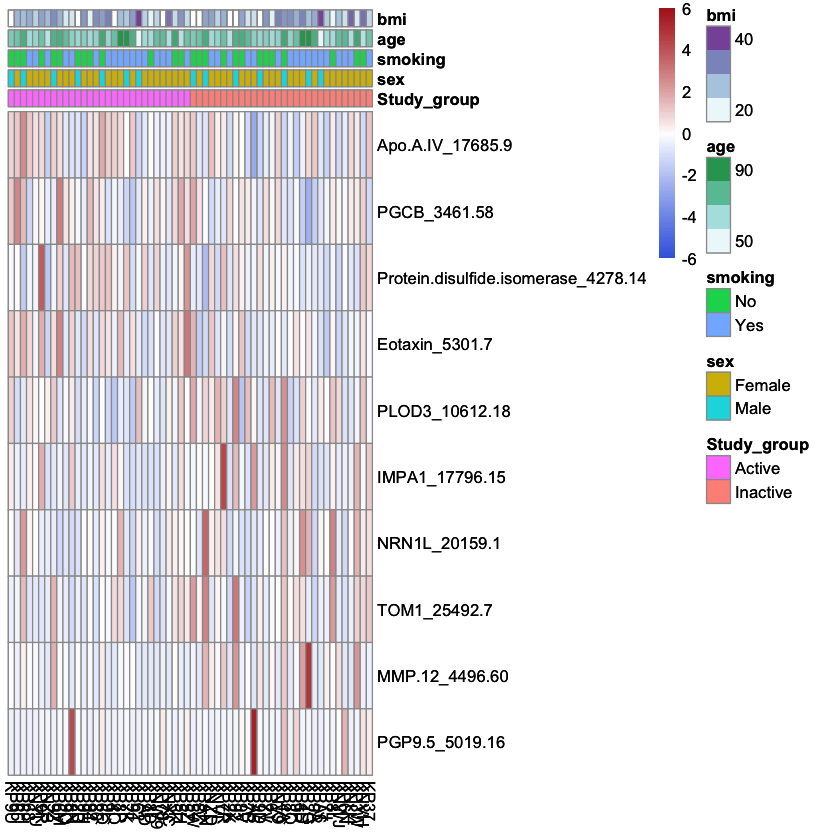

In [43]:
heatmap_plot1 <- pheatmap(zscore_all_proteins_active_and_inactive_only_transposed, annotation = colors_df2,show_colnames = TRUE,
                          show_rownames = TRUE, cluster_cols = FALSE, cluster_rows = FALSE,   color = myColor, breaks = myBreaks)
pdf(file="../../analysis/Figure2_A_B_C_D_E_F/Active_GCA_vs_Inactive_GCA_heatmap.pdf", width = 12, height = 12)
print(heatmap_plot1)
dev.off()
print(heatmap_plot1)

In [19]:
#2.#Make a vector of the sample status for the heatmap
 
colors_df3 <- data.frame(matrix(data = 0, nrow = 60, ncol=1))
colnames(colors_df3) <- "age"
# #print(colors_df)
colors_df3[,1] <- all_proteins$age
rownames(colors_df3) <- all_proteins$sample_ID
head(colors_df3)

,age
,<dbl>
KP9U,69.0
KP65,71.7
KP6H,79.6
KP68,63.1
KNYU,65.3
KP9R,72.4


pdf 
  2

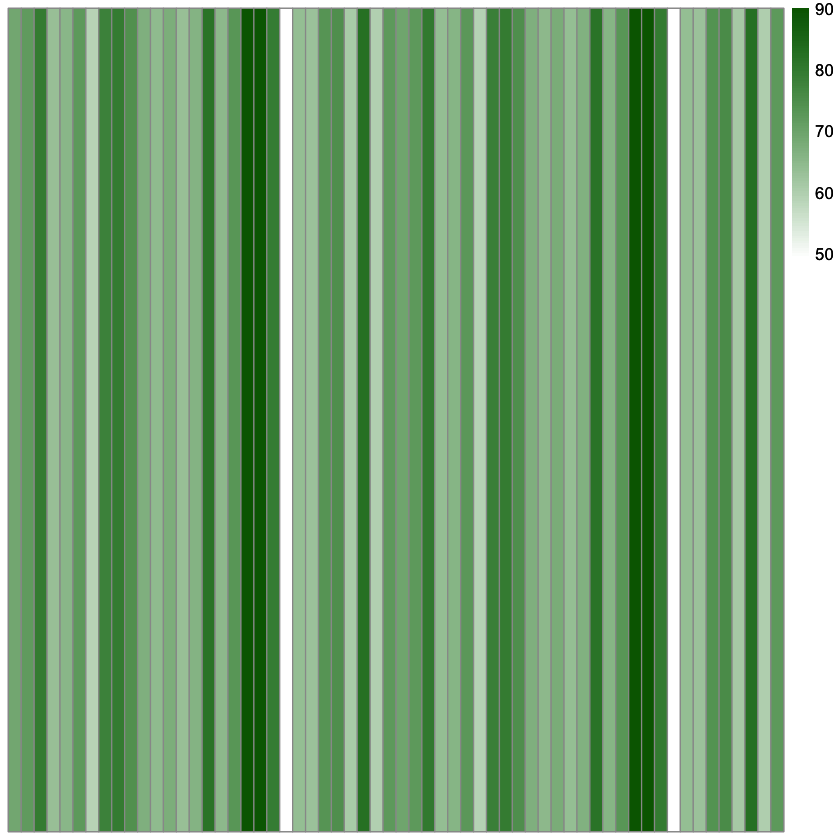

In [42]:
heatmap_plot2 <- pheatmap(t(colors_df3),show_colnames = FALSE,
                          show_rownames = FALSE, cluster_cols = FALSE, cluster_rows = FALSE,color = colorRampPalette(c("white","darkgreen"))(n=100))
pdf(file="../../analysis/Figure2_A_B_C_D_E_F/Active_GCA_vs_Inactive_GCA_age_heatmap.pdf")
print(heatmap_plot2)
dev.off()
print(heatmap_plot2)

In [29]:
#2.#Make a vector of the sample status for the heatmap
 
colors_df4 <- data.frame(matrix(data = 0, nrow = 60, ncol=1))
colnames(colors_df4) <- "bmi"
# #print(colors_df)
colors_df4[,1] <- all_proteins$bmi
rownames(colors_df4) <- all_proteins$sample_ID
head(colors_df4)

,bmi
,<dbl>
KP9U,NA
KP65,27.10246
KP6H,26.18892
KP68,28.44349
KNYU,23.56477
KP9R,29.70839


pdf 
  2

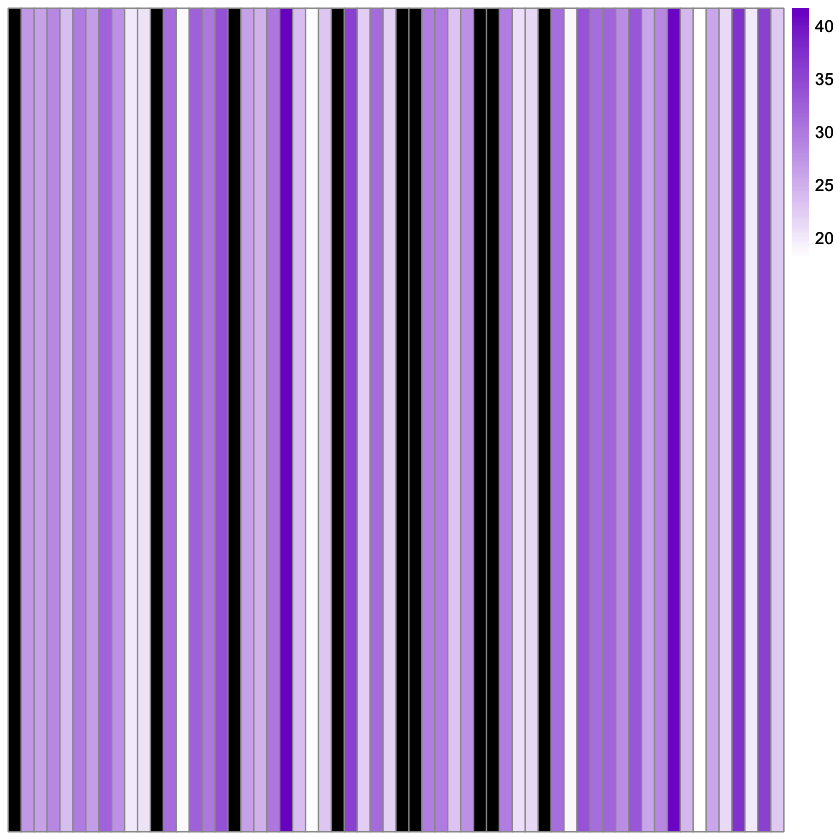

In [44]:
heatmap_plot3 <- pheatmap(t(colors_df4),show_colnames = FALSE,show_rownames = FALSE, cluster_cols = FALSE, 
                          cluster_rows = FALSE,color = colorRampPalette(c("white","purple3"))(n=100), na_col = "black")
pdf(file="../../analysis/Figure2_A_B_C_D_E_F/Active_GCA_vs_Inactive_GCA_bmi_heatmap.pdf")
print(heatmap_plot3)
dev.off()
print(heatmap_plot3)